In [2]:
# 以下のモジュールを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [135]:
# webからデータを取得したり、zipファイルを扱うためのモジュール
import requests, zipfile
from io import StringIO
import io

In [35]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [36]:
mkdir chap2

In [5]:
cd ./chap2

C:\Users\kecy\Documents\データサイエンス\東大GCI\chap2


In [6]:
# データがあるurl の指定
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [7]:
dt_math = pd.read_csv("student-mat.csv", sep=";")

In [8]:
dt_math .head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [41]:
dt_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [42]:
less student.txt

In [43]:
dt_math.absences.head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [44]:
dt_math.sex.head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [45]:
dt_math.groupby('romantic')['health'].mean()

romantic
no     3.528517
yes    3.606061
Name: health, dtype: float64

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64
分散： 64.04954057700951
標準偏差： 8.003095687108177


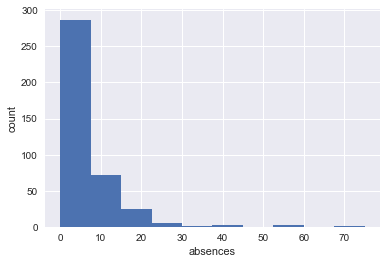

In [46]:
# ヒストグラム
plt.hist(dt_math.absences)

plt.ylabel("count")
plt.xlabel("absences")
plt.grid(True)
print("平均値：", dt_math.absences.mean())
print("中央値：", dt_math.absences.median())
print("最頻値：", dt_math.absences.mode())
print("分散：", dt_math.absences.var())
print("標準偏差：", dt_math.absences.std())

In [47]:
dc = dt_math.absences.describe()
iqr = dc[6]-dc[4]
print(dc)
print('四分位範囲：', iqr)

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64
四分位範囲： 8.0


In [48]:
# 要約統計量をまとめて計算
dt_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


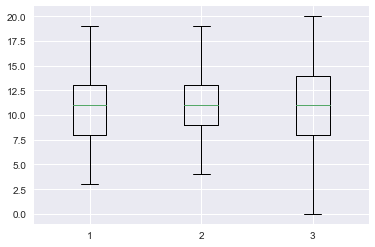

In [49]:
# 箱ひげ図：G1
plt.boxplot([dt_math.G1, dt_math.G2, dt_math.G3])
plt.grid(True)

In [50]:
# 変動係数の算出
cv = dt_math.std() / dt_math.mean() 
print(cv)

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64


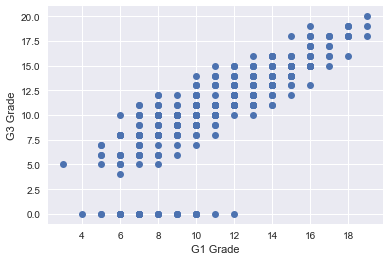

In [52]:
# 散布図
plt.plot(dt_math.G1, dt_math.G3, 'o')
# ラベル
plt.ylabel('G3 Grade')
plt.xlabel('G1 Grade')
plt.grid(True)

In [56]:
# ピアソンの相関係数
sp.stats.pearsonr(dt_math.G1, dt_math.G3)

(0.801, 0.000)

In [57]:
# 相関行列
np.corrcoef([dt_math.G1, dt_math.G2, dt_math.G3])

array([[ 1.   ,  0.852,  0.801],
       [ 0.852,  1.   ,  0.905],
       [ 0.801,  0.905,  1.   ]])

In [60]:
# 共分散行列
np.cov(dt_math.G1, dt_math.G3)

array([[ 11.017,  12.188],
       [ 12.188,  20.99 ]])

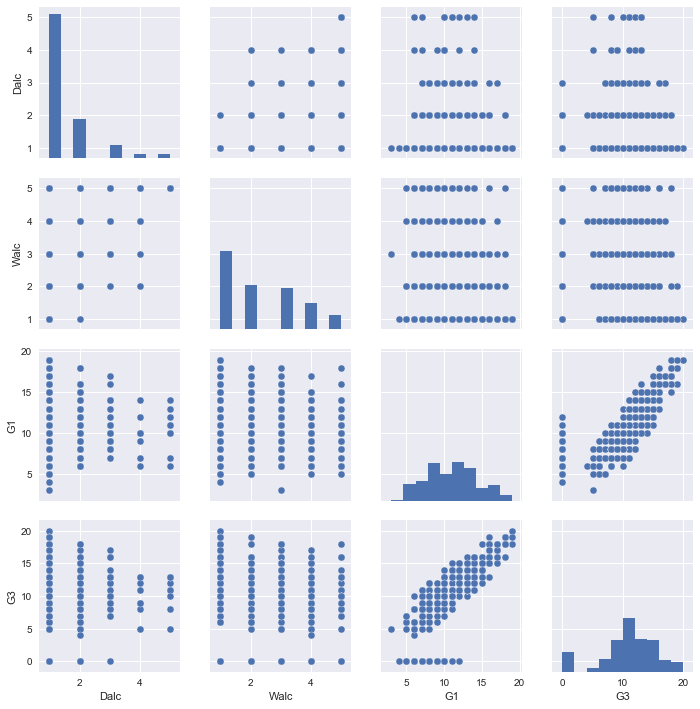

In [61]:
sns.pairplot(dt_math[["Dalc", "Walc", "G1", "G3"]])
plt.grid(True)

In [64]:
# 例：週末にアルコールを飲む人の１期目の成績の平均値
dt_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

In [65]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


In [66]:
dt_por = pd.read_csv('student-por.csv', sep=';')

In [68]:
# <練習問題1>
dt_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [69]:
dt_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [87]:
dt_merged = pd.merge(dt_math, dt_por, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_math', '_por'))
dt_merged.describe()
dt_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 53 columns):
school             382 non-null object
sex                382 non-null object
age                382 non-null int64
address            382 non-null object
famsize            382 non-null object
Pstatus            382 non-null object
Medu               382 non-null int64
Fedu               382 non-null int64
Mjob               382 non-null object
Fjob               382 non-null object
reason             382 non-null object
guardian_math      382 non-null object
traveltime_math    382 non-null int64
studytime_math     382 non-null int64
failures_math      382 non-null int64
schoolsup_math     382 non-null object
famsup_math        382 non-null object
paid_math          382 non-null object
activities_math    382 non-null object
nursery            382 non-null object
higher_math        382 non-null object
internet           382 non-null object
romantic_math      382 non-null object
famr

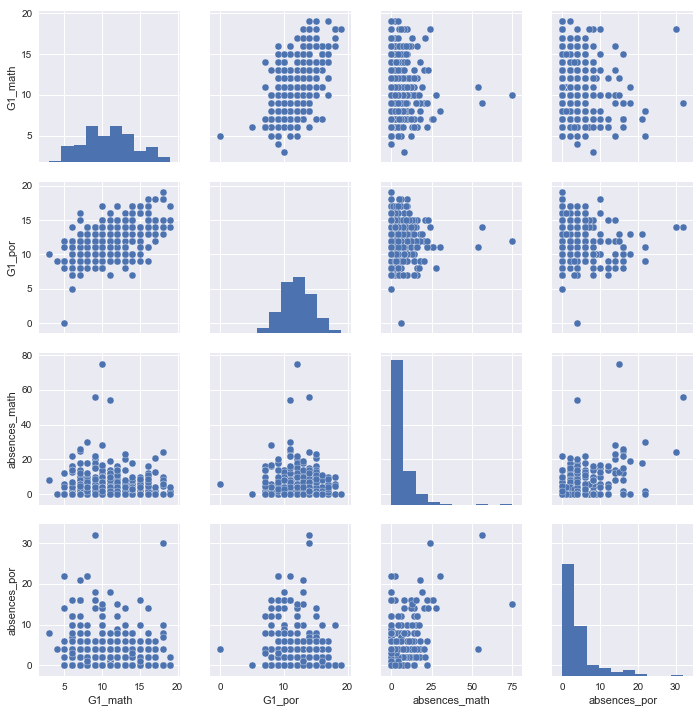

In [91]:
sns.pairplot(dt_merged[['G1_math', 'G1_por', 'absences_math', 'absences_por']])
plt.grid(True)

In [95]:
# サイコロ
dice_data = np.array([1,2,3,4,5,6])
#random.seed(0)
print("1つだけランダムに抽出", random.choice(dice_data, 1))

1つだけランダムに抽出 [1]


In [149]:
n = 1000
choiced = random.choice(dice_data, n)
prob_data = np.array([])
for i in range(1,7):
    prob = len(choiced[choiced==i])/n
    print(i, 'が出る確率：',
          prob)
    prob_data = np.append(prob_data, prob)
print(prob_data)

1 が出る確率： 0.166
2 が出る確率： 0.183
3 が出る確率： 0.181
4 が出る確率： 0.148
5 が出る確率： 0.149
6 が出る確率： 0.173
[ 0.166  0.183  0.181  0.148  0.149  0.173]


In [107]:
# <練習問題1>
coin = np.array([0,1])
n = 1000
rdm = random.choice(coin, n)
for i in range(0,2):
    print(i, 'が出る確率：', len(rdm[rdm==i])/n)

0 が出る確率： 0.511
1 が出る確率： 0.489


In [137]:
# <練習問題2>
# kuji = np.hstack((np.ones(100, dtype='i'), np.zeros(900, dtype='i')))
# random.choice(kuji, 2)
print(100/1000*99/999)

0.009909909909909911


In [147]:
pa = 1/1000
pac = 1-pbi
pba = 99/100
pbac = 3/100
pab = pba*pa/(pba*pa+pbac*pac)
print(pab*100)

3.1976744186046515


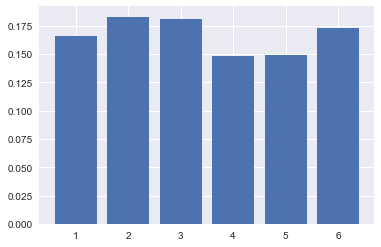

In [150]:
# 一様分布
plt.bar(dice_data, prob_data)
plt.grid(True)

In [152]:
# ベルヌーイ分布
# 0:head 1:tailと考える
prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])
for i in np.unique(coin_data):
    prob = len(coin_data[coin_data==i])/len(coin_data)
    print(i, 'が出る確率：', prob)
    prob_be_data = np.append(prob_be_data, prob)

0 が出る確率： 0.625
1 が出る確率： 0.375


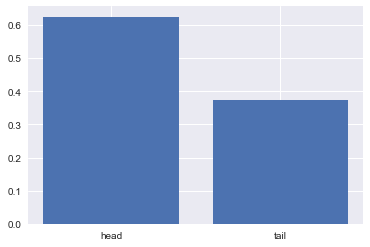

In [153]:
plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

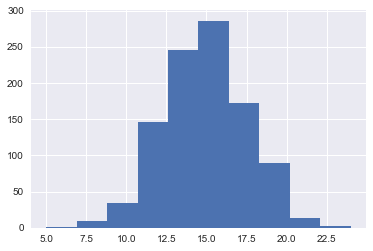

In [169]:
x = random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

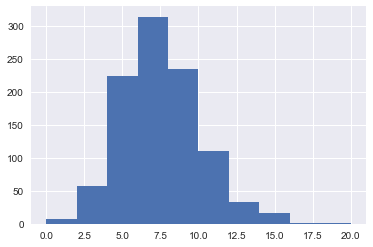

In [174]:
# ポアソン分布
x = random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

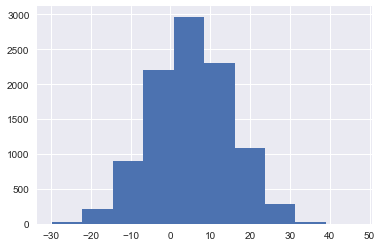

In [175]:
# 正規分布
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

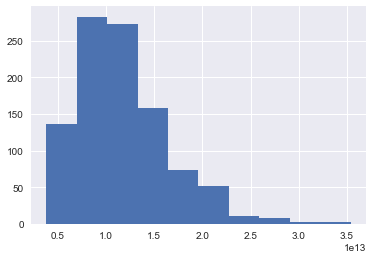

In [176]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

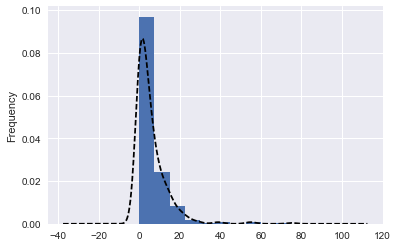

In [182]:
# カーネル密度関数
dt_math.absences.plot(kind='kde', style='k--')
# 単純なヒストグラム、normed=Trueにすることで、確率で表示
dt_math.absences.plot(kind='hist', normed = True)

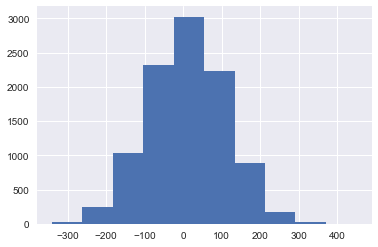

In [189]:
# 練習問題1
x = np.random.normal(10, 100, 10000)
plt.hist(x)
plt.grid(True)

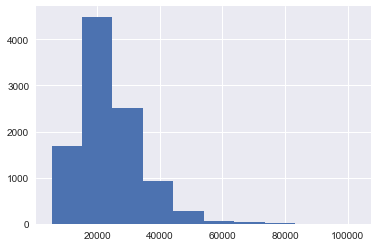

In [10]:
# 練習問題2
x = np.random.lognormal(10, 0.4, 10000)
plt.hist(x)
plt.grid(True)

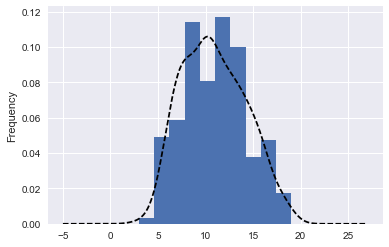

In [13]:
dt_math.G1.plot(kind='kde', style='k--')
dt_math.G1.plot(kind='hist', normed=True)
plt.grid(True)

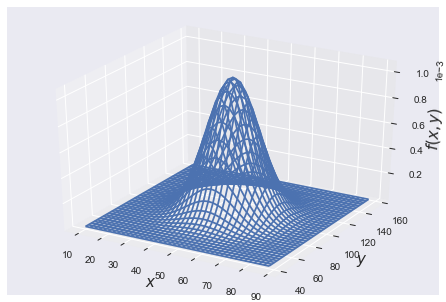

In [32]:
# 必要なモジュールの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# データの設定
x, y = np.mgrid[10:90:2, 40:160:3]
pos = np.empty(x.shape + (2,))
pos[:,:,0]=x
pos[:,:,1]=y

rv = multivariate_normal([50,100],[[100,0],[0,225]])
z = rv.pdf(pos)

# グラフ化
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# ラベルの設定など
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
ax.set_zlabel(r'$f(x, y)$', fontsize=15)
plt.ticklabel_format(style='sci', axis='z', scilimits=(0, 0)) 

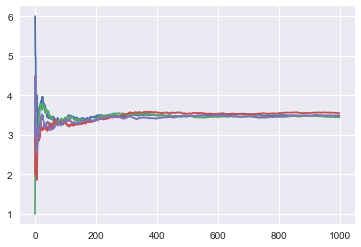

In [35]:
# 大数の法則
# 計算回数
n = 10**3
# サイコロ
dice = np.array([1,2,3,4,5,6])
n_cnt = np.arange(1, n+1)
for i in range(1,5):
    random.seed(i)
    cum_variables = random.choice(dice, n).cumsum()
    plt.plot(cum_variables / n_cnt)

In [68]:
def function_central_theory(N):
    dice = np.array([1,2,3,4,5,6])
    n_cnt = np.arange(1, N+1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1, 10**3):
        random.seed(i)
        cum_variables = random.choice(dice, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1]/N)
        
    plt.hist(mean_array)

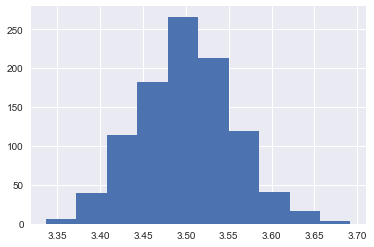

In [72]:
function_central_theory(10**3)

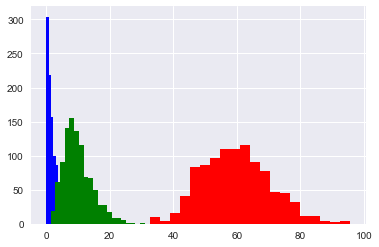

In [76]:
# カイ2乗分布
# 自由度2,10,60に従うカイ2乗分布が生成する乱数のヒストグラム
for df, c in zip([2,10,60], "bgr"):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

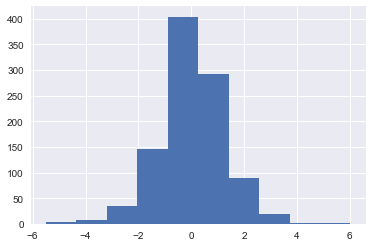

In [81]:
# t分布
random.seed(0)
x = random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

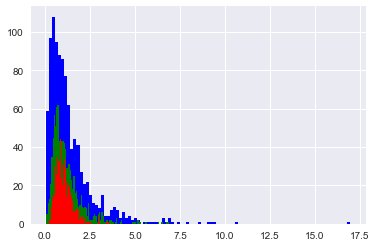

In [82]:
# F分布
for df, c in zip([(6, 7), (10, 10), (20, 25)], "bgr"):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

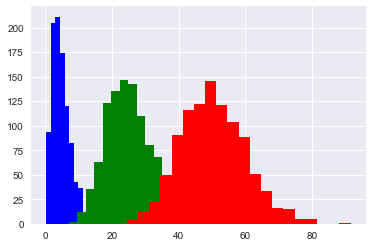

In [87]:
# 2.1.5練習問題1
for df, c in zip([5, 25, 50], 'bgr'):
    x = random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

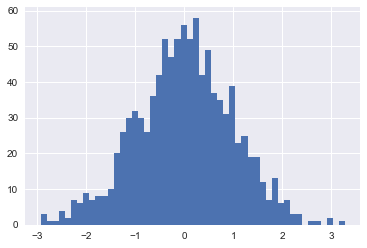

In [90]:
# 2.1.5練習問題2
x = random.standard_t(100, 1000)
plt.hist(x, 50)
plt.grid(True)

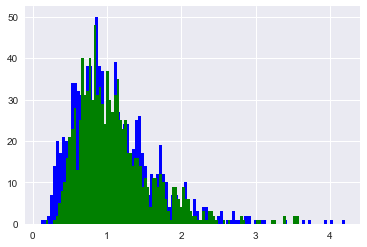

In [91]:
# 2.1.5練習問題3
for df, c in zip([(10, 30), (20, 25)], 'bg'):
    x = random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

In [93]:
import pandas as pd

dt_por = pd.read_csv('student-por.csv', sep=';')
dt_merge = pd.merge(dt_math, dt_por, on=["school","sex","age","address","famsize","Pstatus","Medu"
                                   ,"Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_math', '_por'))
print('G1数学の成績平均：', dt_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', dt_merge.G1_por.mean())

G1数学の成績平均： 10.8612565445
G1ポルトガル語の成績平均： 12.112565445


In [96]:
# 2.1.7練習問題1
from scipy import stats
t, p = stats.ttest_rel(dt_merge.G2_math, dt_merge.G2_por)
print('G2：',p<0.01)
t, p = stats.ttest_rel(dt_merge.G3_math, dt_merge.G3_por)
print('G3：',p<0.01)

G2： True
G3： True


In [97]:
# 2.1.7練習問題2
from scipy import stats
t, p = stats.ttest_rel(dt_merge.absences_math, dt_merge.absences_por)
print('欠席数：',p < 0.01)

欠席数： True


In [99]:
# 2.1.7練習問題3
from scipy import stats
t, p = stats.ttest_rel(dt_merge.studytime_math, dt_merge.studytime_por)
print('勉強時間：',p < 0.01)

勉強時間： False


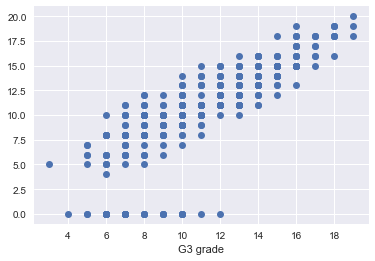

In [103]:
# 散布図
plt.plot(dt_math.G1, dt_math.G3, 'o')
plt.xlabel('G1 grade')
plt.xlabel('G3 grade')
plt.grid(True)

In [119]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
clf = linear_model.LinearRegression()

# 説明変数に "一期目の数学の成績" を利用
X = dt_math.loc[:, ['G1']].as_matrix()
Y = dt_math['G3'].as_matrix()
clf.fit(X,Y)
print('回帰係数：', clf.coef_)
print('切片：', clf.intercept_)

回帰係数： [ 1.106]
切片： -1.6528038288


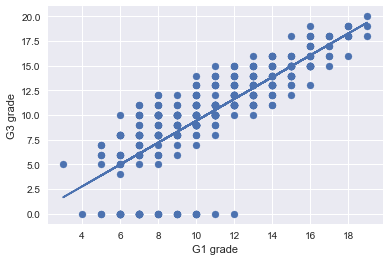

In [121]:
plt.scatter(X, Y)
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.plot(X,clf.predict(X))
plt.grid(True)

In [124]:
 # 決定係数、寄与率とも呼ばれる
print("決定係数:",clf.score(X, Y))

決定係数: 0.642350846052


In [128]:
# 2.1.8練習問題1
X = dt_por.loc[:, ['G1']].as_matrix()
Y = dt_por.G3
clf.fit(X,Y)
print('回帰係数：', clf.coef_)
print('切片：', clf.intercept_)
print('決定係数：', clf.score(X, Y))

回帰係数： [ 0.973]
切片： 0.820398412106
決定係数： 0.682915680017


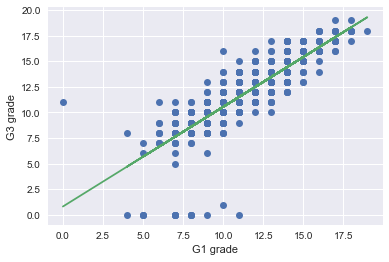

In [131]:
# 2.1.8練習問題2
plt.plot(X,Y, 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, clf.predict(X))
plt.grid(True)

In [134]:
# 2.1.8練習問題3
X = dt_por.loc[:, ['absences']].as_matrix()
clf.fit(X, Y)
print('回帰係数：', clf.coef_)
print('切片：', clf.intercept_)
print('決定係数：', clf.score(X, Y))
print('∴欠席数は期末の成績に対して説明力を持たない')

回帰係数： [-0.064]
切片： 12.1388008627
決定係数： 0.00835013195564
∴欠席数は期末の成績に対して説明力を持たない


In [138]:
# 2.2.1 統計の基礎

# データがあるurl の指定
csv_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

dt_wine = pd.read_csv(csv_url, sep=';')
dt_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [139]:
dt_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


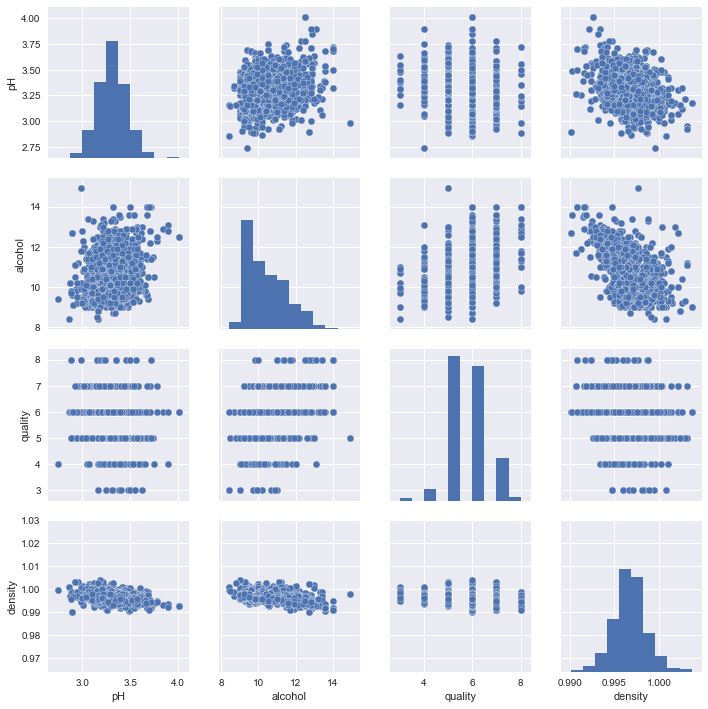

In [141]:
sns.pairplot(dt_wine[["pH", "alcohol", "quality", "density"]])
plt.grid(True)

In [142]:
stats.pearsonr(dt_wine.alcohol, dt_wine.density)

(-0.496, 0.000)